Unsupervised learning - Clustering

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np  
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score, rand_score

In [2]:
df = pd.read_csv('ddos_dataset.csv', low_memory=False)
X = pd.read_csv('pca_dataframe.csv', low_memory=False).to_numpy()
y = df['label']
n_y = len(y.unique()) #number of different labels
y = df['label'].to_numpy()


Number of cluster selection: we evaluate the proper number of clusters on the silhouette score in a validation computing the silhouette score for differents number cluster of parameters for each clustering algorithm chosen

Gaussian Mixture

Best number of clusters: 16 with corresponding silhouette score: 0.5019997358404672


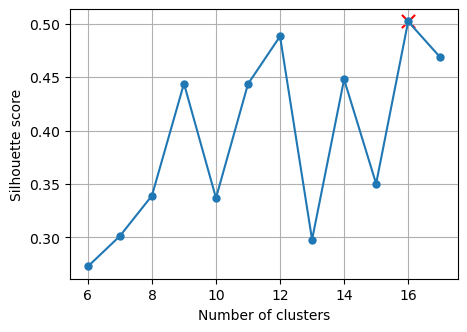

Other metrics: log-likehood, ri, ari


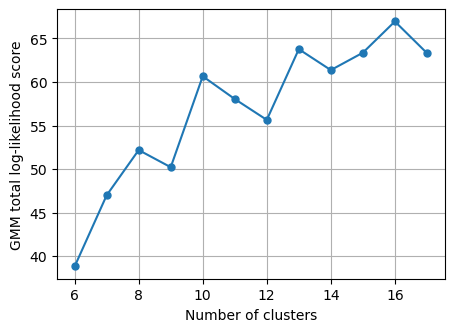

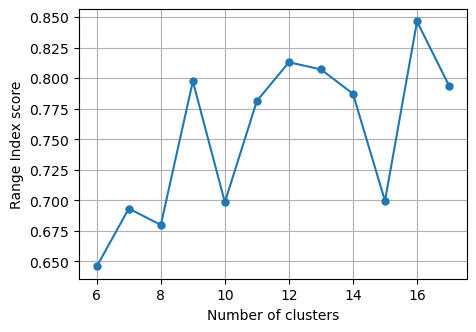

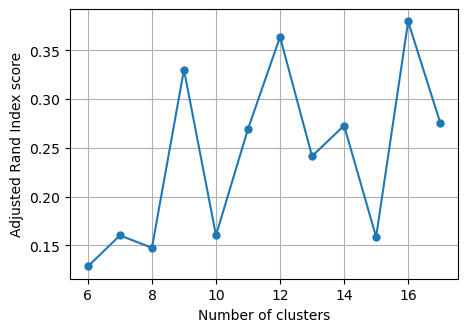

In [18]:
n_cluster = []
sh_scores = []
ri_scores = []
ari_scores = []
log_l_list = []

for n in range (int(n_y / 2), int(1.5 * n_y)):
    gmm = GaussianMixture(n_components=n)
    labels = gmm.fit_predict(X)
    n_cluster.append(n)
    sh_scores.append(silhouette_score(X, labels))
    ri_scores.append(rand_score(np.ravel(y), labels))
    ari_scores.append(adjusted_rand_score(np.ravel(y), labels))
    log_l_list.append(gmm.score(X))

best_sh = np.max(sh_scores)
best_n = n_cluster[np.argmax(sh_scores)]
print(f'Best number of clusters: {best_n} with corresponding silhouette score: {best_sh}')

plt.figure(figsize=(5, 3.5))
plt.plot(n_cluster, sh_scores, marker='o', markersize=5)
plt.scatter(best_n, best_sh, color='r', marker='x', s=90)
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score') 
plt.show()

print("Other metrics: log-likehood, ri, ari")

plt.figure(figsize=(5, 3.5))
plt.plot(n_cluster, log_l_list, marker='o', markersize=5)
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('GMM total log-likelihood score')
plt.show()

plt.figure(figsize=(5, 3.5))
plt.plot(n_cluster, ri_scores, marker='o', markersize=5)
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('Range Index score')
plt.show()

plt.figure(figsize=(5, 3.5))
plt.plot(n_cluster, ari_scores, marker='o', markersize=5)
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('Adjusted Rand Index score')
plt.show()


Text(0.5, 1.0, 'GMM with 16 components')

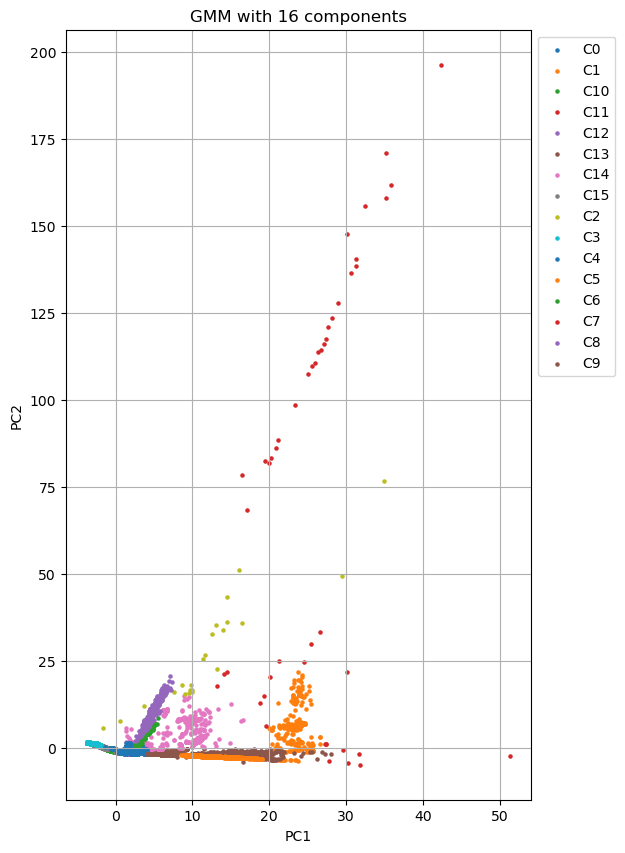

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(pd.read_csv('pca_dataframe.csv'))
df = pd.DataFrame(pca_result)

gmm = GaussianMixture(n_components=16)
labels = gmm.fit_predict(df)
df['cid'] = [f'C{x}' for x in labels]
df['label'] = y.reshape(-1)

plt.figure(figsize=(6,10))
for i in np.unique(df.cid):
    subdf = df[df.cid == i]
    plt.scatter(subdf[0], subdf[1], label=i, s=5)
plt.grid()
lgnd = plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('GMM with 16 components')

DBSCAN

In [3]:
sh_scores = []
for eps in np.arange(0.01, 2, 0.01):
    
    dbscan = DBSCAN(eps=eps)
    labels = dbscan.fit_predict(X)
    try:
        silhouette = silhouette_score(X, labels)
    except:
        silhouette = np.nan 
    sh_scores.append(silhouette)

gs = pd.DataFrame(sh_scores, columns=['eps', 'minPts', 'sh_scores'])
gs = pd.pivot_table(gs, columns='eps', index='minPts', values='sh_scores', aggfunc=lambda x:x)

plt.figure(figsize=(12,3))
max_ss = gs.max().max()
mins_max_ss = gs.stack().idxmax()[0]
eps_max_ss = gs.stack().idxmax()[1]
plt.title(f'The maximum silhouette score is {max_ss} with min_samples of {mins_max_ss} and epsilon of {eps_max_ss}')
sns.heatmap(gs, cmap='Blues', cbar_kws={'label':'Silhouette score'}, linewidths=.005)
plt.gca().invert_yaxis()
plt.show()
